# Exercises in Classification II

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

<hr>
<h1>Task 1 Clean the <code>income</code> variable such that it has only two values </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('adult.csv')
df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Clean income values, because some entries have a "." while others do not.
# income values should be either ">50K" or "<=50K". Before cleaning there was bug with :['<=50K', '>50K', '<=50K.', '>50K.'] 
df['income'] = df['income'].str.replace('.', '', regex=False)

In [3]:
# The datset comtainede both '?' and Null values in workclass, occupation, and native-country columns. 
# I replaced '?' with NaN.
df.replace('?', np.nan, inplace=True)

# Lets drop the nulls. Some models do not handle nulls well.

df = df.dropna()

<hr>
<h1>Task 2 Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.</h1>

<p>To make everything the easiest, like just pick <code>education</code> and <code>hours-per-week</code>, since these two features most clearly have an influence on <code>income</code></p>
<p>First for transformation lets One-hot encode the categorical variables. Models like KNN and Logistic Regression do not handle categorical variables well. Numberical encoding is needed.. Second thing I want to do is transform Hours-Per-Week into a value bwteen 0-1. This is because higher values could give increassed weight on the model, so I'm avoiding that by scaling it down</p>

In [4]:
# Select only needed columns

df = df[['education', 'hours-per-week', 'income']]

df.head()

,education,hours-per-week,income
0,Bachelors,40,<=50K
1,Bachelors,13,<=50K
2,HS-grad,40,<=50K
3,11th,40,<=50K
4,Bachelors,40,<=50K


In [5]:
from sklearn.preprocessing import StandardScaler


# One-hot encode the categorical objects into numerical variables.
df = pd.get_dummies(df, columns=['education'], drop_first=True, dtype=int)
# Scale the 'hours-per-week' feature to a range between 0 and 1.
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Scale 'hours-per-week' to a range between 0 and 1
scaler = StandardScaler()
df['hours-per-week'] = scaler.fit_transform(df[['hours-per-week']])

df.head()



,hours-per-week,income,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,-0.078120,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-2.326738,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.078120,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.078120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.078120,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<hr>
<h1>Task 3 Create X and y dataset and split the datasets into training and testing sets</h1>

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<h1>Train a KNN classifier to predict the variable <code>income</code> based on the feature variables selected in 2 - try out some different Ks </h1>

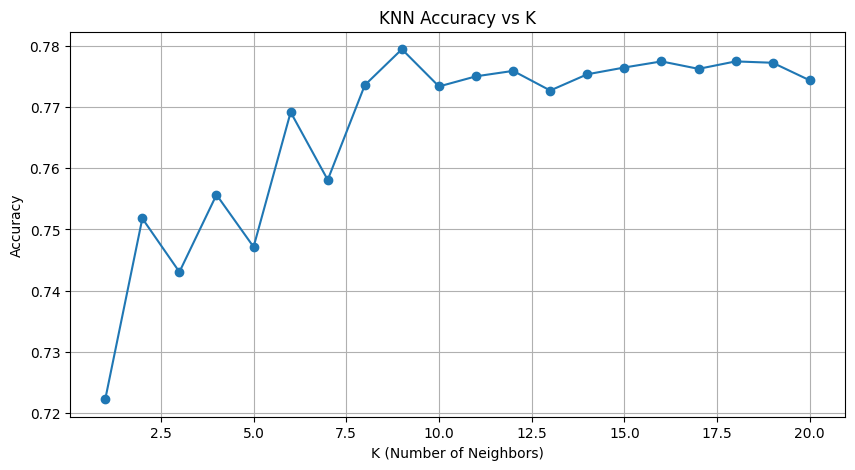

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracies = []
# We tried different values of k from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(10,5))
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


<p>We had a steep climb from k=1 to around k=9 where it peaks. After k=9, the accuracy becomes stable.</p>

<hr>
<h1>Task 5 Train a logistic regression classifier to predict the variable <code>income</code> based on the feature variables selected in 2 and compare it to the KNN classifier.</h1>

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
best_knn_acc = max(accuracies)
print(f"Best KNN Accuracy: {best_knn_acc:.4f}")

Logistic Regression Accuracy: 0.7736
Best KNN Accuracy: 0.7794


<ul>
    <li>Logistic Regression achieved 77.36%</li>
    <li>KNN achieved 77.94%</li>
</ul>
<p>The KNN classifier achieved a slightly higher accuracy than Logistic Regression. Since Logistic Regression is a linear classifier and the KNN is more accuracy, it indicates that the relationship between the features education and hours-perweek and the target income is not perfectly linear. KNN may be better at capturing nonlinear boundaries in the data because it makes predictions based on local neighborhoods </p>

<hr>
<h1>Task 6 Train a decision tree classifier to predict the variable <code>income</code> based on the feature variables selected in 2 and compare it to the previous classifiers.</h1>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=2)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"LogisticRegression Accuracy: {logreg_accuracy:.4f}")
print(f"Best KNN Accuracy: {best_knn_acc:.4f}")

Decision Tree Accuracy: 0.7802
LogisticRegression Accuracy: 0.7736
Best KNN Accuracy: 0.7794


<ul>
    <li>Logistic Regression achieved 77.36%</li>
    <li>KNN achieved 77.94%</li>
    <li>Decision Tree classifier achieved 78.02%</li>
</ul>
<p>The Decision Tree classifier achieved the highest accuracy of 0.7802, but only slightly outperforming the other models. The tree is proberbly best, because it can model non-linear step-wise patterns. Like income junps after a degree or plateaus after 45 hours/week. It's also great at capturing thresholds. Like limitations with certain degrees.  </p>

<hr>
<h1 >Task 7 Train a random forest classifier to predict the variable <code>income</code> based on the feature variables selected in 2 and compare it to the previous classifiers. </h1>

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"LogisticRegression Accuracy: {logreg_accuracy:.4f}")
print(f"Best KNN Accuracy: {best_knn_acc:.4f}")


Random Forest Accuracy: 0.7798
Decision Tree Accuracy: 0.7802
LogisticRegression Accuracy: 0.7736
Best KNN Accuracy: 0.7794


Random Forest is very close behind Decision Tree. RF is usually more stable and resistant to overfitting than a single tree, but with only the two features the advantage might be smaller

<hr>
<h1>Task 8 Train a AdaBoost classifier to predict the variable <code>income</code> based on the feature variables selected in 2 and compare it to the previous classifiers.</h1>

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(random_state=2)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)

print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"LogisticRegression Accuracy: {logreg_accuracy:.4f}")
print(f"Best KNN Accuracy: {best_knn_acc:.4f}")


AdaBoost Accuracy: 0.7803
Random Forest Accuracy: 0.7798
Decision Tree Accuracy: 0.7802
LogisticRegression Accuracy: 0.7736
Best KNN Accuracy: 0.7794


<p>AdaBoost performed the best. This could be because it combines many shallow trees that each corrects the mistakes of the previous one. It's also non-linear and captures threshold</p>